In [1]:
#Importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#Cargar los datos Iris
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
#Modelos
models = {
    'Regresión Logística' : LogisticRegression(max_iter=200), #técnica de análisis de datos que utiliza las matemáticas para encontrar las relaciones entre dos factores de datos. Luego, utiliza esta relación para predecir el valor de uno de esos factores basándose en el otro.
     #Normalmente, la predicción tiene un número finito de resultados, como un sí o un no.
    'Máquinas de Soporte Vectorial ': SVC(), #tipo de algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión en problemas de Machine Learning. La idea es encontrar un hiperplano que separe de manera óptima las diferentes clases de datos
    'Árbol de Decisión' : DecisionTreeClassifier()   #algoritmo de aprendizaje supervisado no paramétrico, que se utiliza tanto para tareas de clasificación como de regresión
}

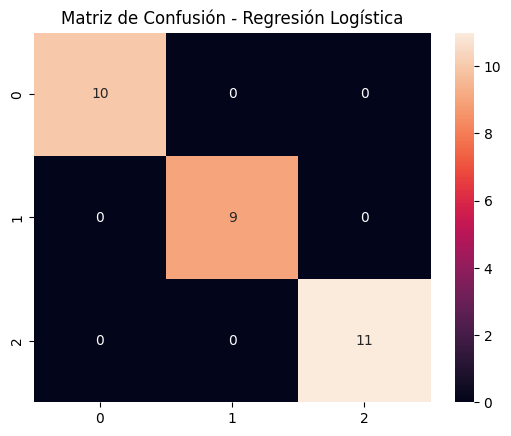

Modelo: Regresión Logística
Precisión: 1.0
Precisión: 1.0
Recall: 1.0
F1-Score: 1.0
Validación Cruzada (5-folds): 0.9733333333333334
-----------------------------------------------



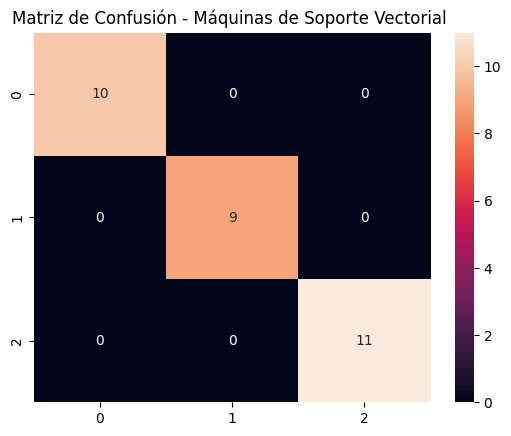

Modelo: Máquinas de Soporte Vectorial 
Precisión: 1.0
Precisión: 1.0
Recall: 1.0
F1-Score: 1.0
Validación Cruzada (5-folds): 0.9666666666666666
-----------------------------------------------



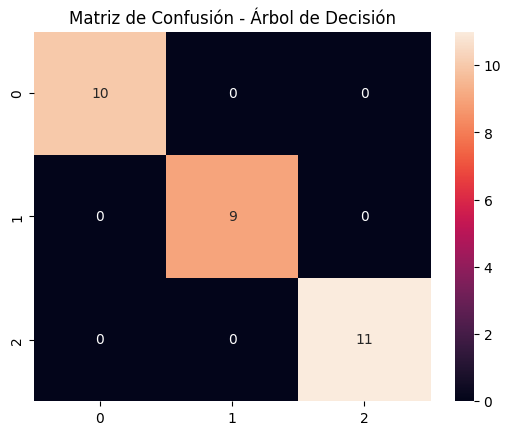

Modelo: Árbol de Decisión
Precisión: 1.0
Precisión: 1.0
Recall: 1.0
F1-Score: 1.0
Validación Cruzada (5-folds): 0.9666666666666668
-----------------------------------------------



In [14]:
#Evaluación de los modelos
for name, model in models.items():
  #Entrenamiento
  model.fit(x_train, y_train)
  #Prediccion
  y_pred = model.predict(x_test)
  #Métricas de Rendimiento - Ayuda a entender cómo funciona desde diferentes puntos cada uno de los elementos que tuvimos en cada modelo
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro') #Proporcion de las predicciones correctas para una clase dada
  recall = recall_score(y_test, y_pred, average='macro') #Proporción de instancias reales de una clase que fueron predichas correctamente. (Casos relevantes dentro de un conjunto de datos)
  f1 = f1_score(y_test, y_pred, average='macro') #metrica que combina la precision y el recall en un sólo número dando una idea de equilibrio de estas 2 metricas

  #Validacion cruzada es una técnica que se utiliza para evaluar la capacidad de generalización de un modelo
  #se obtendra al final es una lista de 5 valores que representan el rendimiento por defecto, la precision del modelo en cada uno de los 5 folds
  #al final se muestra el promedio de los 5 valores para obtener una única metrica de rendimiento
  #la validacion cruzada proporciona una estimación mucho más robusta del rendimiento del modelo
  cross_val = cross_val_score(model, x, y, cv=5)


  #matriz de confusion: ayuda a interpretar los valores que se van a encontrar - falsos positivos, falsos negativos
  conf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_matrix, annot=True) #Creacion de mapa de calor con los resultados de la matrix
  plt.title(f'Matriz de Confusión - {name}')
  plt.show()

  #Imprimir resultados
  print(f'Modelo: {name}')
  print(f'Accuracy: {accuracy}')
  print(f'Precisión: {precision}')
  print(f'Recall: {recall}')
  print(f'F1-Score: {f1}')
  print(f'Validación Cruzada (5-folds): {cross_val.mean()}')
  print('-----------------------------------------------\n')

